Please be aware that this page contains both Python and R code, thus you should avoid running the source code all at once.

# Brief Introduction to EDA

Exploratory Data Analysis (EDA) is a fundamental starting point in data analysis, helping us grasp the data's characteristics, patterns, and possible outliers. It provides essential insights for making informed modeling decisions.

By analyzing the below data, I hope to gain an understanding of overall trends that can aid in refining my hypothesis and inform the construction of a more accurate model.

# ncaahoopR

### 2021-22 season

In [1]:
# let's read in the data and load in relevant libraries
nova2122 <- read.csv('./data/modified_data/nova2122.csv')

library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


shooter,shots,field_goal_percentage
<chr>,<int>,<dbl>
Justin Moore,574,0.4721254
Collin Gillespie,549,0.5336976
Jermaine Samuels,439,0.5535308
Caleb Daniels,356,0.5056180
Eric Dixon,340,0.5794118
Brandon Slater,308,0.5876623
Chris Arcidiacono,69,0.4927536
Jordan Longino,57,0.4210526
Bryan Antoine,46,0.3043478


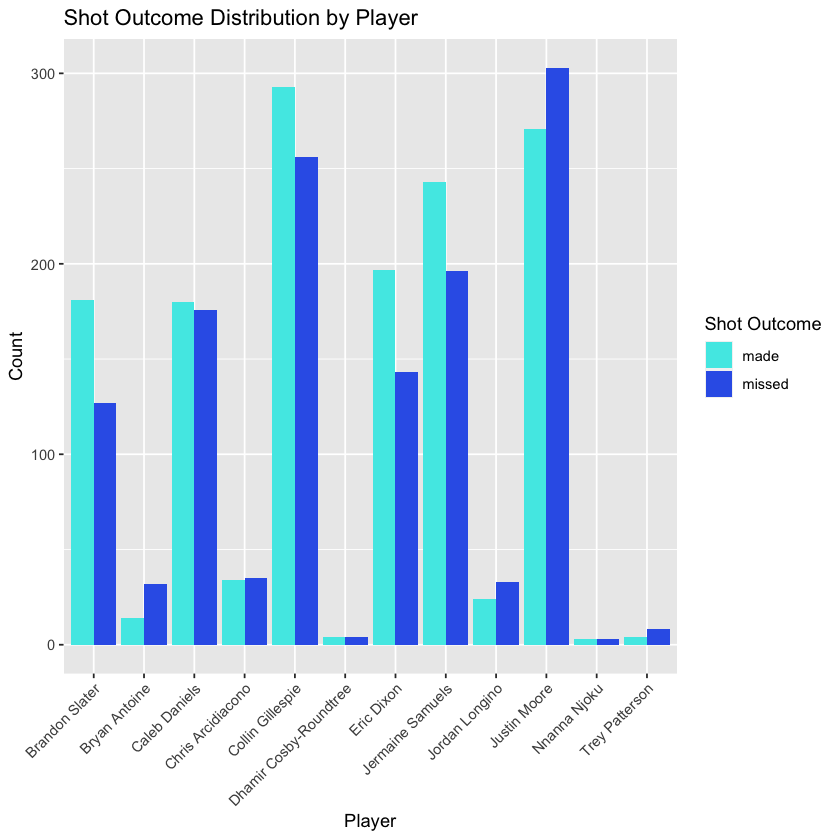

In [2]:
# Create a ggplot for shot outcome distribution by villanova players
nova_players <- nova2122 %>% filter(shooter_team == "Villanova")

ggplot(nova_players, aes(x = shooter, fill = shot_outcome)) +
  geom_bar(position = "dodge") +
  labs(title = "Shot Outcome Distribution by Player", x = "Player", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = c("missed" = "#3464e9", "made" = "#4de9e6")) +
  guides(fill = guide_legend(title = "Shot Outcome"))

# Calculate the mean of shot_outcome for each player (aka field goal percentage)
mean_and_count_data <- nova_players %>%
  group_by(shooter) %>%
   summarize(
    shots = n(),
    field_goal_percentage = mean(ifelse(shot_outcome_numeric == -1, 0, shot_outcome_numeric), na.rm = TRUE)
  ) %>%
  arrange(-shots) 

mean_and_count_data

The table displayed above, arranged in descending order based on the number of shots attempted, presents the field goal percentages of Villanova Men's Basketball (MBB) players for the 2021-22 season. The accompanying ggplot-generated graph visually represents the count of both missed and successful shots for each player. This visualization emphasizes the significant variation in the number of shots taken by different players, which could offer richer data and potential insights for subsequent modeling.

In [4]:
# Create lag variables within each shooter and game_id group
nova2122 <- nova2122 %>%
  arrange(shooter, game_id, play_id) %>%  # Arrange the data by shooter, game_id, and play_id
  group_by(shooter, game_id) %>%
  mutate(
    lag1 = lag(shot_outcome_numeric, order_by = play_id),
    lag2 = lag(shot_outcome_numeric, order_by = play_id, n = 2),
    lag3 = lag(shot_outcome_numeric, order_by = play_id, n = 3),
    lag4 = lag(shot_outcome_numeric, order_by = play_id, n = 4),
    lag5 = lag(shot_outcome_numeric, order_by = play_id, n = 5),
    lag6 = lag(shot_outcome_numeric, order_by = play_id, n = 6)) %>%
    ungroup() %>%
    arrange(game_id, play_id)

write.csv(nova2122, file = "./data/modified_data/nova2122_updated.csv", row.names = FALSE)

# View the updated data with lag variables
head(nova2122)

game_id,play_id,half,shooter,shot_outcome,shooter_team,shot_outcome_numeric,shot_sequence,previous_shots,lag1,lag2,lag3,lag4,lag5,lag6
<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
401365747,4,1,Justin Moore,missed,Villanova,-1,-1,0,NA,NA,NA,NA,NA,NA
401365747,7,1,Clifton Moore,missed,La Salle,-1,-1,0,NA,NA,NA,NA,NA,NA
401365747,11,1,Clifton Moore,missed,La Salle,-1,-2,-1,-1,NA,NA,NA,NA,NA
401365747,13,1,Eric Dixon,missed,Villanova,-1,-1,0,NA,NA,NA,NA,NA,NA
401365747,16,1,Collin Gillespie,made,Villanova,1,1,0,NA,NA,NA,NA,NA,NA
401365747,18,1,Eric Dixon,made,Villanova,1,1,-1,-1,NA,NA,NA,NA,NA


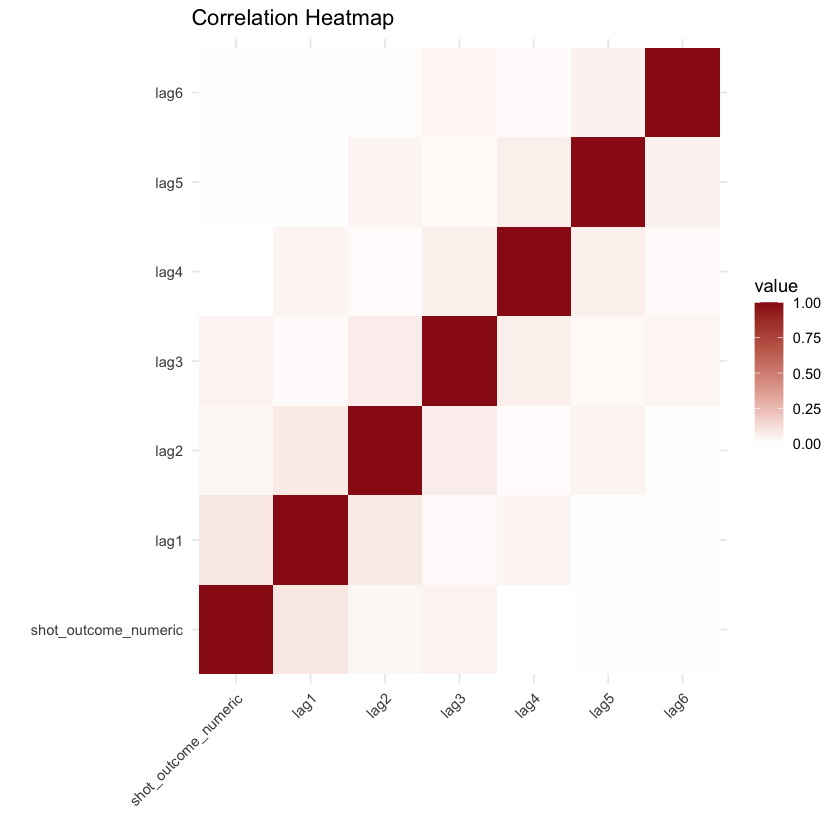

In [15]:
# Calculate the correlation matrix
cor_matrix <- cor(nova2122[, c("shot_outcome_numeric", "lag1", "lag2", "lag3", "lag4", "lag5", "lag6")], use = "pairwise.complete.obs")

library(reshape2)
cor_data <- melt(cor_matrix)

ggplot(cor_data, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "#f69696", high = "#9a1717", midpoint = 0) +
  labs(title = "Correlation Heatmap", x = "", y = "") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

The correlation heatmap presented above carries an intriguing insight. Although it may not reveal strong correlations between "shot_outcome_numeric" and the lag variables individually, a notable descending trend emerges from "lag1" to "lag6." This observation could provide valuable insight, suggesting that a player's shot outcome is more likely to be influenced by their immediate prior shot, rather than a shot taken several attempts ago.

### 2019-20 season

To assess potential disparities, let's replicate the same analysis for the 2019-20 season and compare the resulting graphs and tables with those generated earlier. This comparative approach will help us identify any noticeable differences and potential insights.

In [2]:
#let's read in the data
nova1920 <- read.csv('./data/modified_data/nova1920.csv')

shooter,shots,field_goal_percentage
<chr>,<int>,<dbl>
Collin Gillespie,491,0.4969450
Saddiq Bey,458,0.5349345
Justin Moore,355,0.4647887
Jeremiah Robinson-Earl,347,0.5533141
Jermaine Samuels,334,0.5419162
Cole Swider,171,0.4561404
Brandon Slater,68,0.3823529
Dhamir Cosby-Roundtree,36,0.6666667
Bryan Antoine,25,0.3600000


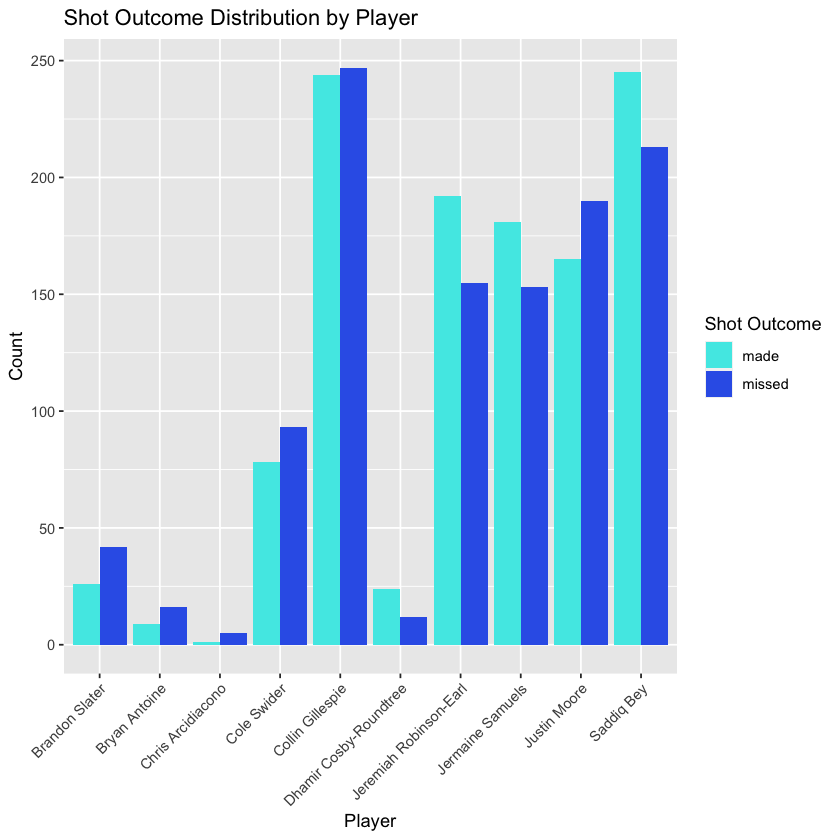

In [3]:
# Create a ggplot for shot outcome distribution by villanova players
nova_players <- nova1920 %>% filter(shooter_team == "Villanova")

ggplot(nova_players, aes(x = shooter, fill = shot_outcome)) +
  geom_bar(position = "dodge") +
  labs(title = "Shot Outcome Distribution by Player", x = "Player", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = c("missed" = "#3464e9", "made" = "#4de9e6")) +
  guides(fill = guide_legend(title = "Shot Outcome"))

# Calculate the mean of shot_outcome for each player
mean_and_count_data <- nova_players %>%
  group_by(shooter) %>%
   summarize(
    shots = n(),
    field_goal_percentage = mean(ifelse(shot_outcome_numeric == -1, 0, shot_outcome_numeric), na.rm = TRUE)
  ) %>%
  arrange(-shots) 

mean_and_count_data

In [6]:
# Create lag variables within each shooter and game_id group
nova1920 <- nova1920 %>%
  arrange(shooter, game_id, play_id) %>%  # Arrange the data by shooter, game_id, and play_id
  group_by(shooter, game_id) %>%
  mutate(
    lag1 = lag(shot_outcome_numeric, order_by = play_id),
    lag2 = lag(shot_outcome_numeric, order_by = play_id, n = 2),
    lag3 = lag(shot_outcome_numeric, order_by = play_id, n = 3),
    lag4 = lag(shot_outcome_numeric, order_by = play_id, n = 4),
    lag5 = lag(shot_outcome_numeric, order_by = play_id, n = 5),
    lag6 = lag(shot_outcome_numeric, order_by = play_id, n = 6)) %>%
    ungroup() %>%
    arrange(game_id, play_id)

# View the updated data with lag variables
head(nova1920)

game_id,play_id,half,shooter,shot_outcome,shooter_team,shot_outcome_numeric,shot_sequence,previous_shots,lag1,lag2,lag3,lag4,lag5,lag6
<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
401166061,2,1,Duane Washington Jr.,made,Ohio State,1,1,0,NA,NA,NA,NA,NA,NA
401166061,4,1,Saddiq Bey,missed,Villanova,-1,-1,0,NA,NA,NA,NA,NA,NA
401166061,6,1,Saddiq Bey,missed,Villanova,-1,-2,-1,-1,NA,NA,NA,NA,NA
401166061,8,1,Duane Washington Jr.,made,Ohio State,1,2,1,1,NA,NA,NA,NA,NA
401166061,9,1,Collin Gillespie,missed,Villanova,-1,-1,0,NA,NA,NA,NA,NA,NA
401166061,11,1,CJ Walker,made,Ohio State,1,1,0,NA,NA,NA,NA,NA,NA



Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




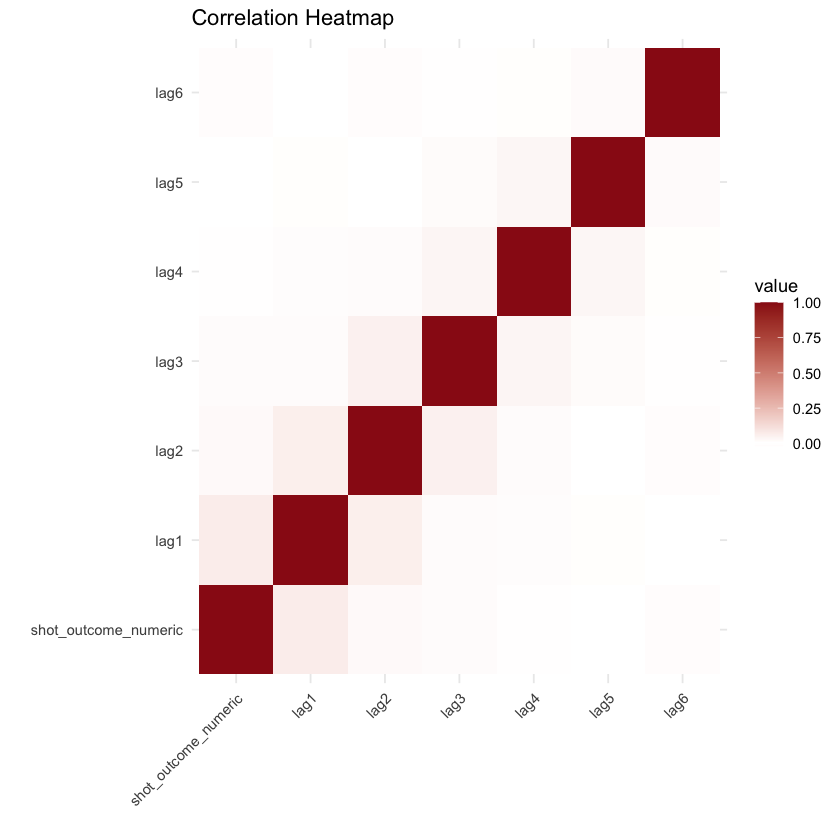

In [7]:
# Calculate the correlation matrix
cor_matrix <- cor(nova1920[, c("shot_outcome_numeric", "lag1", "lag2", "lag3", "lag4", "lag5", "lag6")], use = "pairwise.complete.obs")

library(reshape2)
cor_data <- melt(cor_matrix)

ggplot(cor_data, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "#f69696", high = "#9a1717", midpoint = 0) +
  labs(title = "Correlation Heatmap", x = "", y = "") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

We can observe that, despite some player variations, most of the graphs maintain a substantial degree of consistency, which further supports the earlier findings.

# News API

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
news_api = pd.read_csv('./data/modified_data/sentiment_scores_with_titles.csv')

In [2]:
#what does this data look like?
news_api.head()

,Title,Description,Sentiment Label
0,how to watch jack catterall vs jorge linares l...,jack catterall hopes to add a win to his resum...,positive
1,jaguars vs steelers livestream: how to watch n...,jacksonville look to make it five wins in a ro...,positive
2,vikings vs packers livestream: how to watch nf...,want to watch the minnesota vikings play the g...,positive
3,dolphins' chase claypool says there was 'frust...,after being traded from the 1-4 chicago bears ...,negative
4,seahawks vs bengals livestream: how to watch n...,two of the nfl's most potent offenses clash in...,negative


In [6]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the Lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Tokenization and lowercase
    words = text.lower().split()
    
    # Remove stopwords and apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return ' '.join(words)

# Apply preprocessing to the 'text' column
news_api['cleaned_text'] = news_api['Description'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/williammcgloin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/williammcgloin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/williammcgloin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
news_api.to_csv('./data/modified_data/news_api_naive.csv', index=False)

#what does the new column of data look like?
news_api.head()

,Title,Description,Sentiment Label,cleaned_text
0,how to watch jack catterall vs jorge linares l...,jack catterall hopes to add a win to his resum...,positive,jack catterall hope add win resume redeem loss...
1,jaguars vs steelers livestream: how to watch n...,jacksonville look to make it five wins in a ro...,positive,jacksonville look make five win row head pitts...
2,vikings vs packers livestream: how to watch nf...,want to watch the minnesota vikings play the g...,positive,want watch minnesota viking play green bay pac...
3,dolphins' chase claypool says there was 'frust...,after being traded from the 1-4 chicago bears ...,negative,traded chicago bear miami dolphin last friday ...
4,seahawks vs bengals livestream: how to watch n...,two of the nfl's most potent offenses clash in...,negative,two nfl potent offense clash cincinnati


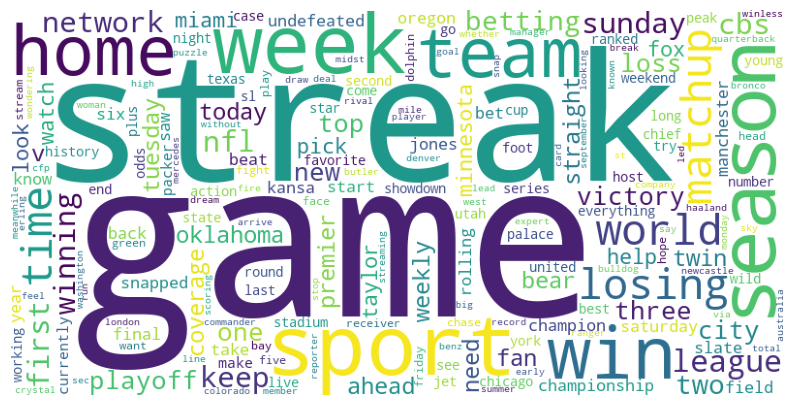

In [8]:
# Import more necessary libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Define the function to plot the word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(10, 6))
    # Display the word cloud
    plt.imshow(wordcloud)
    # Remove axis details
    plt.axis("off")
    # Show the word cloud
    plt.show()

# Define the function to generate and display the word cloud
def generate_word_cloud(my_text):
    # Generate the word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        collocations=False,
        stopwords=STOPWORDS
    ).generate(my_text)
    # Plot and display the word cloud
    plot_cloud(wordcloud)

# let's pass the 'cleaned_text' column to the function
generate_word_cloud(' '.join(news_api['cleaned_text']))


Within the word cloud, generated from articles collected through the news API, notable recurring terms include "win," "losing," "victory," "winning," "matchup," and others. These terms hold the potential to offer insights into the articles' context and serve as valuable cues for conducting sentiment analysis.

# Individual Player Data

In [13]:
#let's import some libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
aaronjudge = pd.read_csv('./data/modified_data/aaronjudge.csv')

In [3]:
#let's learn about the data
aaronjudge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              100 non-null    object 
 1   Team              100 non-null    object 
 2   Opp               100 non-null    object 
 3   BO                100 non-null    int64  
 4   Pos               100 non-null    object 
 5   PA                100 non-null    float64
 6   H                 100 non-null    int64  
 7   2B                100 non-null    int64  
 8   3B                100 non-null    int64  
 9   HR                100 non-null    int64  
 10  R                 100 non-null    int64  
 11  RBI               100 non-null    int64  
 12  SB                100 non-null    int64  
 13  CS                100 non-null    int64  
 14  BB%               100 non-null    float64
 15  K%                100 non-null    object 
 16  ISO               100 non-null    float64
 17

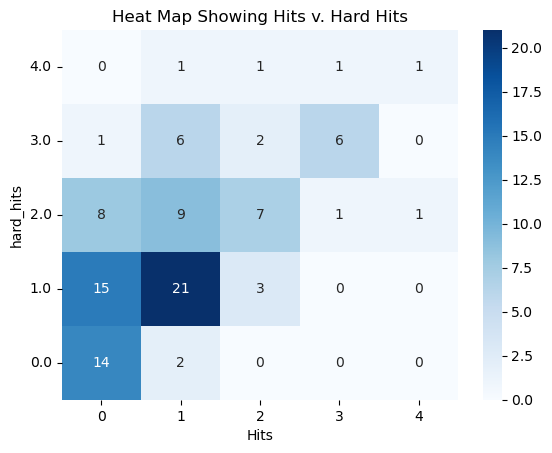

In [4]:
# Create a pivot table to count the observations
pivot_table = aaronjudge.pivot_table(index='hard_hits', columns='H', aggfunc='size', fill_value=0)

# Create a heatmap
ax = sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt="d")

# Customize the y-axis to start at 0 and increase as you go up
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.invert_yaxis()

# Customize the plot if needed
plt.title("Heat Map Showing Hits v. Hard Hits")
plt.xlabel("Hits")
plt.ylabel("hard_hits")

plt.show()

In this heatmap, hits are represented on the x-axis, while hard hits are depicted on the y-axis. The unit of observation corresponds to a player's at-bats within a game. Notably, there are instances, such as nine games for the specific player Aaron Judge, where he had two hard-hit balls but only managed to secure one hit. While the seaborn-generated graph above indeed suggests a positive correlation between these variables, there are discernible distinctions between them. It prompts the consideration that using hard hit percentage as a target variable to measure success may offer a more robust approach, as it mitigates factors beyond the batter's control. For example, a batter might make solid contact (barrel the ball) but hit it directly to a fielder, categorizing it as a hard hit ball without resulting in a hit. Hence, hard hit percentage emerges as a more suitable target variable for assessment.

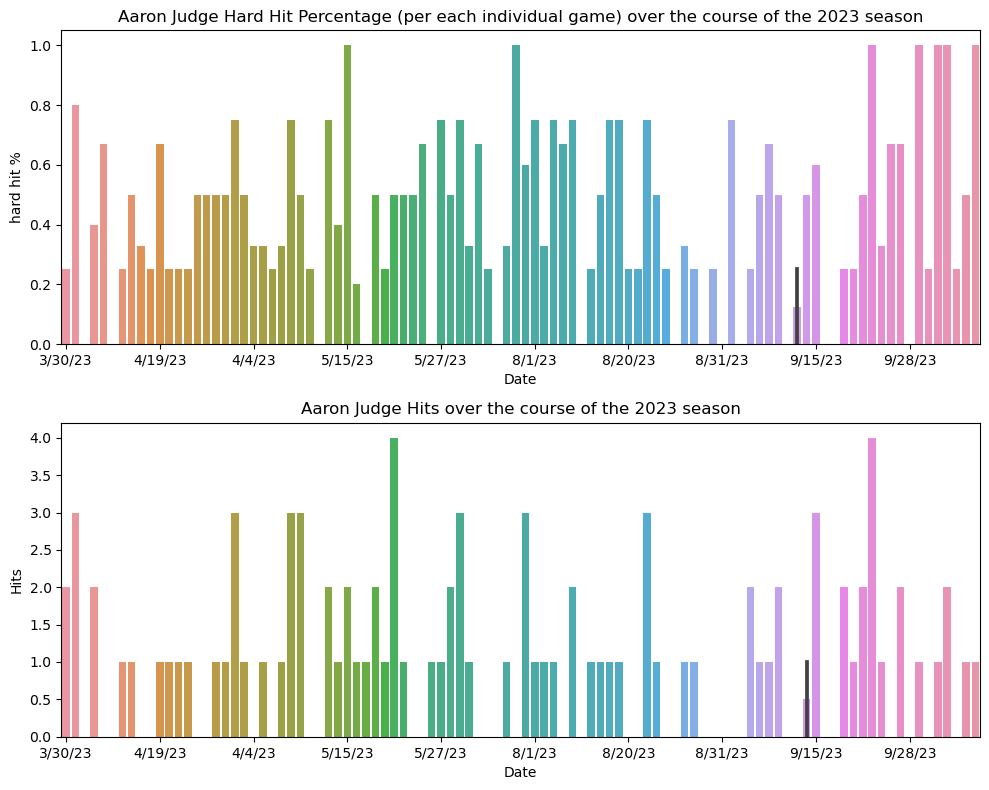

In [16]:
# Sort the DataFrame by Date in ascending order
aaronjudge = aaronjudge.sort_values(by='Date')

# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# First subplot - correct_hardhit%
sns.barplot(data=aaronjudge, y='correct_hardhit%', x='Date', ax=axes[0])
axes[0].set_title("Aaron Judge Hard Hit Percentage (per each individual game) over the course of the 2023 season")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("hard hit %")
# Get the x-axis tick positions
x_ticks = axes[0].get_xticks()

# Show every 10th label
visible_ticks = x_ticks[::10]

# Set the x-axis labels
axes[0].set_xticks(visible_ticks)

# Second subplot - H
sns.barplot(data=aaronjudge, y='H', x='Date', ax=axes[1])
axes[1].set_title("Aaron Judge Hits over the course of the 2023 season")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Hits")
# Get the x-axis tick positions
x_ticks = axes[1].get_xticks()

# Show every 10th label
visible_ticks = x_ticks[::10]

# Set the x-axis labels
axes[1].set_xticks(visible_ticks)

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the combined figure
plt.show()


The depicted graph highlights the potential for uncovering meaningful trends in hard hit data, surpassing the simplistic examination of hits alone. It suggests the feasibility of leveraging past hard hit data to predict future hard hit performance, potentially driven by autocorrelation or seasonality. This insight holds promise for enhancing the precision of future models.

# Hypothesis Refinement

Following the above analysis, my null hypothesis, asserting that the "hot hand" is actually a fallacy, remains unchanged. However, the alternative hypotheses have been refined for both basketball and baseball analyses based on the insights drawn from the visualizations. In the context of basketball, the refined alternative hypothesis suggests that a player's shot outcome is more likely to be influenced by their immediately preceding shot, rather than one taken several attempts ago. In the context of baseball, my alternative hypothesis suggests that a batter's hard hit percentage is more likely influenced by their prior hard hit percentage rather than solely assessing success or streaks based on hits.

# Extra Joke

What kind of car does Darth Vader drive? A toy-Yoda!
<br></br>
![yoda car](./images/toy-yoda.jpeg)

# Watch Out!

you can't be too careful when exploring!
<br></br>
![me & a bear](./images/me_and_bear.jpeg)